In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
# make data

angles = np.arange(0, 4 * np.pi, 0.1 * np.pi / 180)
dat = 0.5 * np.sin(angles)


X = []  # input
y = []  # output

n_steps = 100
n_predicts = 1
for i in range(0, len(dat) - n_steps - n_predicts):
    X.append(dat[i:i + n_steps])
    y.append(dat[i + n_steps])

X = np.array(X)
y = np.array(y)

In [4]:
# make tensor-like data

X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
# make dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)


print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)


Training Shape : (5324, 100, 1) (5324,)
Testing Shape : (1775, 100, 1) (1775,)


In [6]:
# make model

model = Sequential()
model.add(LSTM(10, activation='tanh', input_shape = (100, 1)))
# model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model training
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
history = model.fit(X, y, epochs=1000, verbose=0, callbacks = [es])

2023-02-13 15:02:06.244902: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


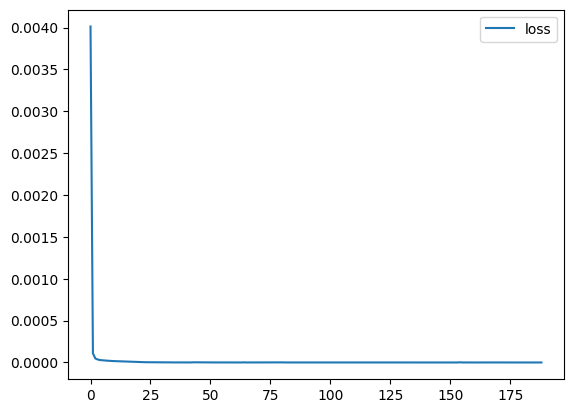

In [9]:
# show history
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

In [20]:
test_y = model.predict(X)


222/222 [==============================] - 1s 2ms/step


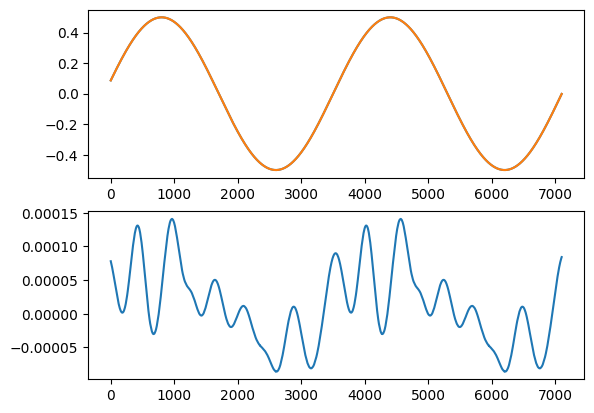

In [21]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y)
plt.show()

In [18]:
# save model
import os
model_name = 'LSTM_predict_sin_from_sin'
model_version = 'layer_10_10'
model_path = os.path.join(os.getcwd().split('notebooks')[0], 'models', model_name, model_version)
print(model_path)
model.save(model_path)

/Users/a12319/PycharmProjects/accidentdetection_lv2/models/LSTM_predict_sin_form_sin/layer_10_10


INFO:tensorflow:Assets written to: /Users/a12319/PycharmProjects/accidentdetection_lv2/models/LSTM_predict_sin_form_sin/layer_10_10/assets


INFO:tensorflow:Assets written to: /Users/a12319/PycharmProjects/accidentdetection_lv2/models/LSTM_predict_sin_form_sin/layer_10_10/assets


In [19]:
## load model
model = tf.keras.models.load_model(model_path)